In [1]:
!pip install qiskit[all] qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.5/541.5 kB 23.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=642e2be500b0e050662d8ddec6924a57e4d1bc950dd8f107409a937ec8a3e300
  Stored in directory: /root/.cache/pip/wheels/b1

In [15]:
from qiskit import *
from qiskit.circuit.library import UnitaryGate, QFT
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import numpy as np

In [24]:
theta = np.random.random()
unitary = UnitaryGate([[1, 0], [0, np.exp(2*np.pi*1j*theta)]])
CUnitary = unitary.control(1)

In [38]:
n = 7
qft = QFT(num_qubits=n, do_swaps=False).inverse()
circ = QuantumCircuit(n+1, n)
circ.h(range(3))
circ.x(n)

for i in range(1, n+1):
  gate_count = 2**(n-i)
  for j in range(gate_count):
    circ.append(CUnitary, [i-1, n])


circ.append(qft, range(n))
circ.measure([0, 1, 2], [0, 1, 2])

/tmp/ipython-input-38-2602241461.py:2: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qft = QFT(num_qubits=n, do_swaps=False).inverse()


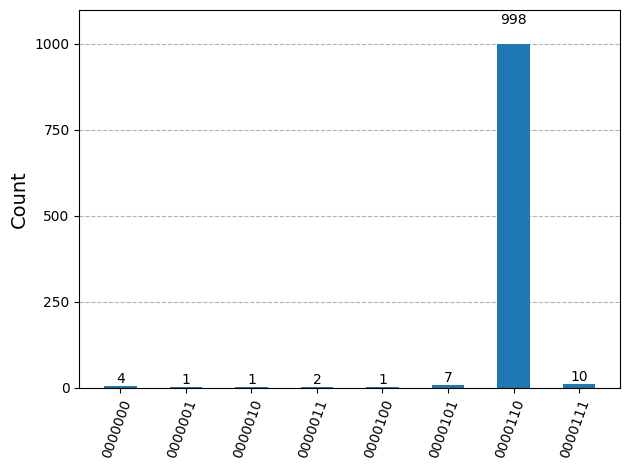

In [39]:
simulator = Aer.get_backend("qasm_simulator")
transpiled_circ = transpile(circ, simulator)
job = simulator.run(transpiled_circ)
result = job.result()
plot_histogram(result.get_counts())

In [41]:
def binary_frac_to_decimal(fractional):
  decimal_fraction = 0
  for i, bit in enumerate(fractional):
      decimal_fraction += int(bit) * (2 ** -(i + 1))
  return decimal_fraction

In [44]:
error = abs(theta - binary_frac_to_decimal("0000110"))
print(error) # the most probable state is the phase approximation

0.000619812424696331
